# Curvatura de uma curva

In [110]:
import sympy as sp
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Curvatura 

Seja $\gamma$ uma curva parametrizada pelo comprimeto de arco. Definimos **curvatura** como a função $\kappa(t) = ||\ddot{\gamma}(t)||$. Essa definição é consistente com o que esperávamos de uma reta (curvatura nula) e de um círculo (curvatura constante). Além disso se $\gamma$ é uma curva regular qualquer, ela tem uma reparametrização pelo comprimento de arco. Portanto, podemos definir a sua curvatura como sendo a curvatura de sua reparametrização pelo comprimento de arco. Isto é, seja $\hat{\gamma}$ uma reparametrização pelo comprimento de arco de $\gamma$ com curvatura $\kappa$. Então a curvatura de $\gamma$ será $\kappa$. 

Uma questão que se levanta é: e se houver outra reparametrização pelo comprimento de  arco para $\gamma$? Para isso, precisamos mostrar que a curvatura é invariante (não muda) segundo a reparametrização. Isso não é dificíl de ver pois as tangentes das reparametrizações têm mesmo tamanho e, possivelmente, diferentes sinal.

### Curvatura de uma curva regular

Seja $\gamma(t)$ uma curva em $\mathbb{R}^3$, então sua curvatura é dada pela expressão

$$
\kappa = \frac{||\ddot{\gamma} \times \dot{\gamma}||}{||\dot{\gamma}||^3}
$$

Observe que para curvas no plano essa expressão pode também ser utilizada, 

$$
\kappa = \frac{|\ddot{\gamma}_1\dot{\gamma}_2 - \ddot{\gamma}_2\dot{\gamma}_1|}{||\dot{\gamma}||^3}
$$

### Curvatura com sinal 

Definimos a **normal unitária com sinal** $n(s)$ o vetor unitário que rotaciona o vetor tangente no sentido anti-horário em $\pi/2$. Em particular, $\ddot{\gamma}(s)$ e $\dot{\gamma}(s)$ são perpendiculares (pois a curva é parametrizada pelo comprimento de arco) e, portanto, é paralelo a $n(s)$, e assim

$$
\ddot{\gamma}(s) = \kappa_s(s) n(s)
$$

Chamamos $\kappa_s$ de **curvatura com sinal**. Em particular, $\kappa = |\kappa_s|$.

### Função Ângulo 

Dada uma curva diferenciável $\gamma: I \to \mathcal{S}^1$, onde $\mathcal{S}^1$ é o círculo centrado na origem, dizemos que $\theta : I \to \mathbb{R}$ é função ângulo de $\gamma$ quando 
$$
\gamma(s) = (\cos(\theta(s)), \sin(\theta(s)), \forall s \in I
$$

*Observe que nessa definição, a imagem de $\gamma$ é um subconjunto de $\mathcal{S}^1$, como se fosse um arco. Por exemplo,*

$\gamma(s) = (\cos(2s), \sin(2s)) \implies \theta(s) = 2s$.

Considere o operador que rotaciona no sentido anti-horário em 90° um vetor. Podemos descrevê-lo em forma matricial como 

$$
J = \begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$

Defina o **determinante** entre dois vetores como 

$$
det(v,w) = \langle Jv , w \rangle
$$

que é o produto interno do vetor $v$ rotacionado e $w$.

#### Diferenciabilidade

Seja $\gamma : I \to \mathcal{S}^1$ uma curva diferenciável. Então $\gamma$ admite uma função ângulo $\theta$ diferenciável. Além disso, se $\hat{\theta}$ é função ângulo diferenciável de $\gamma$, ela difere de $\theta$ por uma constante. 

> Note que supondo a existência dessa função diferenciável, temos que, por aplicação da Regra da Cadeia, 
$$
\gamma '(s) = \theta '(s)(-\sin(\theta(s)), \cos(\theta(s))) = \theta '(s) J\gamma(s)
$$
Portanto, aplicando o produto interno em ambos os lados, observamos que 
$$
\theta '(s) = det(\gamma(s), \gamma '(s))
$$
Assim, a demonstração se dá defininido $\theta$ com essa derivada (Teorema Fundamental do Cálculo). 


Agora seja $\alpha$ uma curva regular, sem perda de generalidade, parametrizada pelo comprimento de arco. Seja $t(s) = \alpha '(s)$. Como $||t(s)|| = 1$, pela proposição anterior, existe uma função ângulo diferenciável $\theta$ de forma que definimos a curvatura de $\alpha$ como

$$
k(s) = \theta '(s) = det(t(s), t'(s)) = det(\alpha'(s), \alpha''(s))
$$

**Observação 1:** Se $\alpha$ é regular, sua curvatura é 
$$
\kappa(s) = \frac{det(\alpha'(s), \alpha''(s))}{||\alpha '(s)||^3}
$$

**Observação 2:** Estamos rotacionando o vetor tangente, obtendo o que chamamos de *vetor normal unitário* e fazendo o produto interno com a aceleração da curva, o que coincide com a definição prévia! 

**Exemplo:** Considere a parametrização do círculo $\alpha(s) = p + r(\cos(s/r), \sin(s/r)), s \in \mathbb{R}$. Assim

$$
\alpha'(s) = (-\sin(s/r), \cos(s/r))
$$

$$
\alpha''(s) = -\frac{1}{r}(\cos(s/r), \sin(s/r)) = \frac{1}{r}J\alpha '(s)
$$

$$
\kappa(s) = \langle J\alpha '(s), \alpha ''(s) \rangle = \frac{1}{r}
$$


**Exemplo 2:** Vamos usar python para calcular a curvatura da espiral equiangular $z(t) = e^{(a + i)t}$ onde $a$ é uma constante e $i^2 = -1$. 

In [77]:
# Definimos as variáveis 
t = sp.symbols('t', real = True)
a = sp.symbols('a', real = True, constant = True)
# Definimos a função z
z = sp.exp((a + sp.I)*t)
# Derivando 
zt = sp.diff(z, t)
ztt = sp.diff(zt, t)
# Rotaciona zt
Jzt = zt*sp.exp(sp.I*sp.pi/2)

Observe que nossa curva está definida no plano complexo (isomorfo ao plano real). Para calcular a curvatura de uma curva, rotacionamos o vetor e fazemos o produto `dot`entre esses números como produto escalar de dois vetores. Nesse caso, teremos que $\langle z_1, z_2 \rangle = Re(z_1\cdot\bar{z}_2)$.

In [95]:
k = sp.re(Jzt*sp.conjugate(ztt))/sp.Abs(zt)**3
k

(2*a**2*exp(2*a*t) - (a**2 - 1)*exp(2*a*t))*exp(-3*a*t)/(a**2 + 1)**(3/2)

Precisamos indicar para o programa que queremos uma resposta fatorizada

In [97]:
k = sp.factor(k)
k

exp(-a*t)/sqrt(a**2 + 1)

Assim, essa é a curvatura da espiral equiangular. 

## Movimento Rígido

**Isometria:** Uma aplicação $F: \mathbb{R}^n \to \mathbb{R}^n$ que preserva distância, isto é, $||x - y|| = ||F(x) - F(y)||, \forall x, y \in \mathbb{R}^n$. Diremos uma **movimento rígido** é uma isometria (a rigidez em mudar distâncias).

**Translação:** Uma aplicação $F: \mathbb{R}^n \to \mathbb{R}^n$  do tipo $v \mapsto F(v) := v + a$, para algum $a \in \mathbb{R}^n$ fixo. 

**Transformação Ortogonal:** Uma transformação **linear** que presetva o produto interno, isto é, $\langle u, v \rangle = \langle T(u), T(v) \rangle$. A matriz associada a essa transformação é ortogonal. 

Dizemos que o movimento é **direto** se $det(P) = 1$ e oposto ou inverso quando $det(P) = -1$. 

### Teorema 

Seja $P_{n\times n}$ uma matriz ortogonal e $a \in \mathbb{R}^n$. Então $F: \mathbb{R}^n \to \mathbb{R}^n$ definido como $F(v) = Pv + a$ é uma isometria. Reciprocamente, toda isometria pode ser escrito nessa forma.  Esse teorema permite uma caracterização simples de um movimento rígido.

### Invariância da curvatura

Sejam $\Phi = A + p_0$ um movimento rígido direto de $R^2$ e $\alpha : I \to \mathbb{R}^2$ uma curva regular parametrizada por comprimento de arco. Então, $\beta = \Phi \circ \alpha : I \to \mathbb{R}^2$ é uma curva regular de $\mathbb{R}^2$, parametrizada por comprimento de arco, cuja função curvatura coincide com a de $\alpha$, isto é, $\kappa_{\alpha}(s) = \kappa_{\beta}(s) \forall s \in I$.

> Observe que derivar $\beta ' = \Phi'(\alpha) = A\alpha '$ o que garante que $\beta$ é parametrizada pelo comprimento de arco e que $\beta '' = A\alpha ''$. Portanto, como $det(A) = 1$, vale que as curvaturas são as mesmas. 

## Equações de Frenet 

Seja $\alpha$ uma curva parametrizada pelo compimento de arco com vetor normal $n(s)$ e vetor tangente $t(s)$. Observe que para cada $s$, esses vetores formam um base ortonormal para $\mathbb{R}^2$. Chamamos essa base de  *diedro de Frenet*. Já definimos curvatura com sinal $\kappa$ quando $t'(s) = \kappa(s) n(s)$. Além disso, $||n(s)|| = 1 \implies n(s) \perp n'(s)$. Portanto $n'(s)$ é paralelo a $t(s)$. Logo $n'(s) = \langle n'(s), t(s) \rangle t(s)$ e: 

$$
\langle n'(s), t(s) \rangle = \langle Jt'(s), t(s) \rangle = -\langle t'(s), Jt(s) \rangle = -det(t(s), t'(s)) = -\kappa(s)
$$

Assim obtemos as *equações de Frenet*: 

$$
t' = \kappa \cdot n
$$
$$
n' = -\kappa \cdot t
$$

As equações de Frenet são, portanto, um sistema de equações diferenciais envolvendo a base ortonormal para cada $s$. 

## Teorema Fundamental das Curvas no Plano

Sejam $I$ um intervalo aberto e $\kappa : I \to \mathbb{R}$ uma função diferenciável. Então, existe
uma curva diferenciável, $\alpha : I \to \mathbb{R}^2$, parametrizada por comprimento de arco, cuja função curvatura $\kappa_{\alpha}$ coincide com $\kappa$. Além disso, para toda curva $\beta : I \to \mathbb{R}^2$, parametrizada por comprimento de arco, que cumpre $\kappa_{\beta} = \kappa$, existe um movimento rígido $\Phi : \mathbb{R}^2 \to \mathbb{R}^2$, tal que $\alpha = \Phi \circ \beta$.

**Exemplo:** (Reconstrução de uma curva plana) Suponha que nos é dado uma curvatura $\kappa$. Como $\kappa = \theta '$ e $\alpha' = (\cos(\theta), \sin(\theta))$. Vamos supor que o intervalo é do tipo $[0,l]$, onde $l$ é o comprimento da curva. 

In [184]:
def get_curve_from_curvature(k, tf, x0, y0): 
    # ângulo
    theta_ = solve_ivp(fun = k, 
                       t_span = (0,tf), 
                       y0 = [0], 
                       t_eval = np.arange(0,tf+1e-4,0.01)
                      ).y[0]
    
    def theta(t): 
        li = int(t*(len(theta_)-1)/tf)
        gi = min(int(t*(len(theta_)-1)/tf) + 1, len(theta_)-1)
        convex = t*len(theta_)/tf - li
        return (1-convex)*theta_[li] + convex*theta_[gi]
    
    # Componentes 
    def f(t,x): 
        return [np.cos(theta(t)), np.sin(theta(t))]
    
    # Curva
    alpha = solve_ivp(fun = f, 
                      t_span = (0,tf), 
                      y0 = [x0,y0], 
                      t_eval = np.arange(0,tf+1e-4,0.01)
                     ).y
    
    return alpha

### Círculo

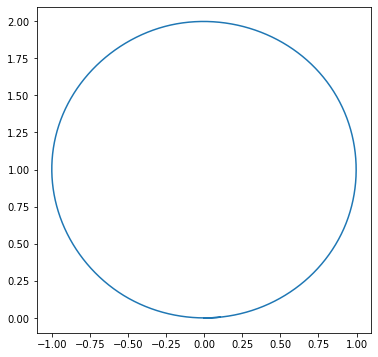

In [188]:
# Curvatura
k = lambda t,x: 1
# Um ponto em que passa a curva 
x0 = 0
y0 = 0
# Comprimento da curva
tf = 2*np.pi+0.1

alpha = get_curve_from_curvature(k,tf,x0,y0)

plt.figure(figsize = (6,6))
plt.plot(alpha[0,:], alpha[1,:])
plt.show()

### Reta

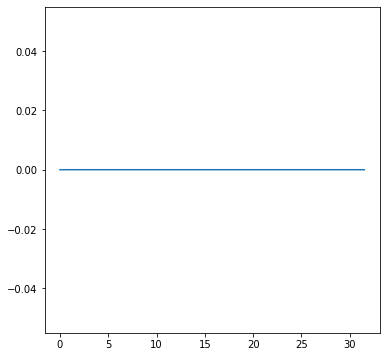

In [189]:
# Curvatura
k = lambda t,x: 0
# Um ponto em que passa a curva 
x0 = 0
y0 = 0
# Comprimento da curva
tf = 10*np.pi+0.1

alpha = get_curve_from_curvature(k,tf,x0,y0)

plt.figure(figsize = (6,6))
plt.plot(alpha[0,:], alpha[1,:])
plt.show()

### Clotoide

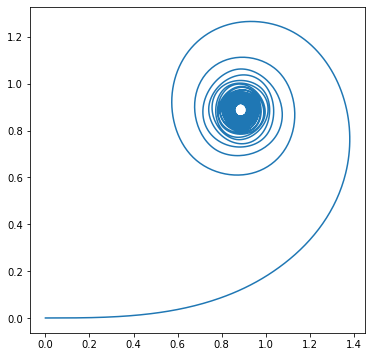

In [185]:
# Curvatura
k = lambda t,x: t
# Um ponto em que passa a curva 
x0 = 0
y0 = 0
# Comprimento da curva
tf = 10*np.pi+0.1

alpha = get_curve_from_curvature(k,tf,x0,y0)

plt.figure(figsize = (6,6))
plt.plot(alpha[0,:], alpha[1,:])
plt.show()